In [1]:
# mount my Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# change directories
%cd ./gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/ml_project

/content/gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/ml_project


In [3]:
# install/import the dependencies
!pip install -U ydata_profiling -q

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 100.0 MB/s eta 0:00:00


In [4]:
# read 'student.csv' in as a Pandas DataFrame
df = pd.read_csv(r"./notebooks/data/student.csv")

In [5]:
# output five random samples from the 'df' DataFrame
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
218,male,group B,high school,free/reduced,none,66,77,70.0
500,female,group D,master's degree,standard,none,74,79,82.0
731,male,group A,some high school,free/reduced,none,55,46,43.0
207,male,group E,high school,standard,completed,81,80,NaN
911,female,group A,some college,standard,none,69,84,82.0


In [6]:
# output the data type, memory usage, number of null values, and unique values for each column
df_info = (pd.DataFrame
           (
               {
                   "data_type": [str(dtype) for dtype in df.dtypes], 
                   "memory_usage": np.round(df.memory_usage(deep=True)[1:] / 1e6, 4), 
                   "n_nulls": df.isna().sum(), 
                   "n_unique": df.nunique()
               }
            )
           .sort_values(["data_type", "memory_usage"])
           )

df_info

,data_type,memory_usage,n_nulls,n_unique
writing_score,float64,0.0080,130,76
math_score,int64,0.0080,0,81
reading_score,int64,0.0080,0,72
race_ethnicity,object,0.0592,150,5
test_preparation_course,object,0.0619,30,2
gender,object,0.0620,0,2
lunch,object,0.0640,70,2
parental_level_of_education,object,0.0716,0,6


In [7]:
# create a ProfileReport for the 'df' DataFrame
profile = ProfileReport(df, explorative=True)

In [8]:
# output the ProfileReport's findings
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# save the ProfileReport as an HTML file
profile.to_file(r"./notebooks/data/student_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# for each lunch category, output the average math score
(df
 .dropna()
 .groupby("lunch")
 ["math_score"]
 .mean()
 .to_frame()
 .sort_values("math_score", ascending=False)
 .reset_index()
)

,lunch,math_score
0,standard,70.053488
1,free/reduced,59.051724


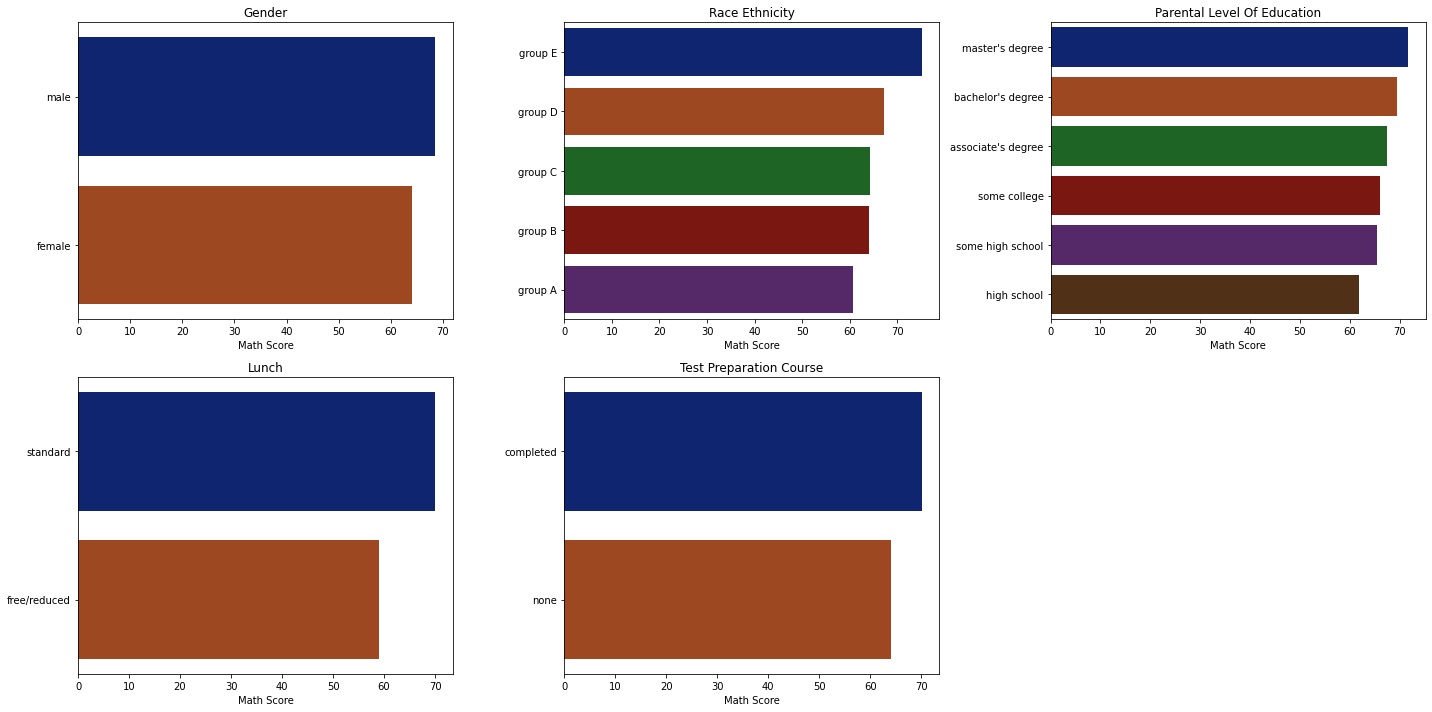

In [11]:
# output a horizontal bar plot for each categorical feature w.r.t. the target
cat_cols = df.select_dtypes("object").columns.tolist()
target = "math_score"
i = 1
plt.figure(figsize=(20, 10))
for col in cat_cols:
  plt.subplot(2, 3, i)
  df_temp = (df
             .dropna()
             .groupby(col)
             [target]
             .mean()
             .to_frame()
             .sort_values(target, ascending=False)
             .reset_index()       
  )
  sns.barplot(
      x=target, 
      y=col, 
      data=df_temp, 
      palette="dark"
  )
  plt.xlabel(target.title().replace("_", " "))
  plt.ylabel(None)
  plt.title(col.title().replace("_", " "))
  i += 1

plt.tight_layout();